In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
os.chdir(r"C:\Users\Mohiuddin\Desktop\machine learning\ML\incedo-hackerearth\incedo_participant")

In [40]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")
sub = pd.read_csv("test_dataset.csv")
submission = pd.read_csv("sample_submission.csv")

In [57]:
train.head(2)

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1.0,0,3,1,1,1.0,1.0,1.0,average,worst,Some additional information that we would need...
1,2,1.0,0,3,1,1,NaN,1.5,1.0,excellent,worst,"After reading the expirement, I realized that ..."


In [5]:
test.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText
0,1673,1,0,3,average,worst,The procedures I think they should have includ...
1,1674,1,0,3,average,worst,"In order to replicate this experiment, you wou..."
2,1675,1,0,3,above_average,above_average,"In order to replicate their experiment, you wo..."
3,1676,1,0,3,worst,worst,Pleace a simple of one material into one conta...
4,1677,1,0,3,worst,worst,Determin the mass of four different samples ma...


In [58]:
submission.head()

,id,essay_set,essay_score
0,1673,1,NaN
1,1674,1,NaN
2,1675,1,NaN
3,1676,1,NaN
4,1677,1,NaN


In [41]:
essay_score = train[["score_1","score_2","score_3","score_4","score_5"]]

In [42]:
train['essay_score'] = essay_score.mean(axis=1).round()

In [61]:
train.head()

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText,essay_score
0,1,1.0,0,3,1,1,1.0,1.0,1.0,average,worst,Some additional information that we would need...,1.0
1,2,1.0,0,3,1,1,NaN,1.5,1.0,excellent,worst,"After reading the expirement, I realized that ...",1.0
2,3,1.0,0,3,1,1,1.0,1.0,1.5,worst,above_average,"What you need is more trials, a control set up...",1.0
3,4,1.0,0,3,0,0,0.0,0.0,1.0,worst,worst,The student should list what rock is better an...,0.0
4,5,1.0,0,3,2,2,2.0,2.5,1.0,above_average,worst,For the students to be able to make a replicat...,2.0


In [43]:
train.drop(["score_1","score_2","score_3","score_4","score_5"],axis = 1, inplace = True)

In [33]:
print(train.shape)
train.isnull().sum()

(17043, 8)


ID               0
Essayset       157
min_score        0
max_score        0
clarity        138
coherent       145
EssayText        0
essay_score      0
dtype: int64

In [44]:
mapping = {'average':1, 'excellent':2, 'worst':3, 'above_average':4,np.nan : train.clarity.mode()}

In [45]:
train["clarity"] = train.clarity.map(mapping) 
test["clarity"] = test.clarity.map(mapping) 


In [46]:
train.coherent.unique()

array(['worst', 'above_average', 'average', 'excellent', nan],
      dtype=object)

In [47]:
mapping = {'worst':3, 'above_average':4, 'average':1, 'excellent':2,np.nan : train.coherent.mode()}

In [48]:
train["coherent"] = train.coherent.map(mapping) 
test["coherent"] = test.coherent.map(mapping) 

In [15]:
train.isnull().sum()

ID               0
Essayset       157
min_score        0
max_score        0
clarity          0
coherent         0
EssayText        0
essay_score      0
dtype: int64

In [49]:
train.fillna(method='ffill', inplace=True)

In [17]:
train.isnull().sum()

ID             0
Essayset       0
min_score      0
max_score      0
clarity        0
coherent       0
EssayText      0
essay_score    0
dtype: int64

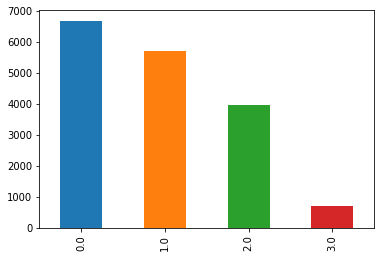

In [72]:
train.essay_score.value_counts().plot(kind = 'bar')

In [50]:
y = train.essay_score

In [51]:
train.drop(["ID","essay_score"],axis = 1,inplace = True)
test.drop("ID",axis = 1,inplace = True)

In [52]:
print(train.shape)
print(test.shape)

(17043, 6)
(5224, 6)


In [76]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [77]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(train["EssayText"])
X_train_dtm.shape

(17043, 15921)

In [78]:
test1 = test["EssayText"]

In [79]:
# fit and transform X_train into X_train_dtm
X_test_dtm = vect.transform(test1)
X_test_dtm.shape

(5224, 15921)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(train["EssayText"])
X_test_tfidf = tfidf_vectorizer.transform(test["EssayText"])

In [ ]:
#pp = pd.DataFrame(X_atrain_dtm.toarray(), columns=vect.get_feature_names())

In [25]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [54]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
nb.fit(X_train_tfidf, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
sub = pd.read_csv("test_dataset.csv")

In [56]:
predictions = nb.predict(X_test_tfidf)
final_result = pd.DataFrame({'id':sub['ID'],'essay_set':sub['Essayset'],'essay_score':predictions})
xy  = final_result[["id","essay_set","essay_score"]]
xy.to_csv('NBSolution.csv',index=False)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=700)
model.fit(X_train_tfidf, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
predictions = model.predict(X_test_tfidf)
final_result = pd.DataFrame({'id':sub['ID'],'essay_set':sub['Essayset'],'essay_score':predictions})
xy  = final_result[["id","essay_set","essay_score"]]
xy.to_csv('RFSolution2.csv',index=False)

In [58]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
logreg.fit(X_train_tfidf, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
predictions = logreg.predict(X_test_tfidf)
final_result = pd.DataFrame({'id':sub['ID'],'essay_set':sub['Essayset'],'essay_score':predictions})
xy  = final_result[["id","essay_set","essay_score"]]
xy.to_csv('lg1.csv',index=False)

In [63]:
import xgboost as xgb

In [64]:
# Fitting a simple xgboost on tf-idf svd features
clf = xgb.XGBClassifier(max_depth=7, n_estimators=1200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(X_train_tfidf, y)
predictions = clf.predict(X_test_tfidf)

#print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [65]:
final_result = pd.DataFrame({'id':sub['ID'],'essay_set':sub['Essayset'],'essay_score':predictions})
xy  = final_result[["id","essay_set","essay_score"]]
xy.to_csv('xgbSolution9.csv',index=False)